In [1]:
pip install -U selenium

Requirement already up-to-date: selenium in c:\users\isabe\anaconda3\lib\site-packages (3.141.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import itertools

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import urllib.request
import urllib.parse

DRIVER_PATH = '/path/to/chromedriver'

options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")
driver = webdriver.Chrome(options=options, executable_path=r'E:\Downloads\chromedriver_win32\chromedriver')
driver.get("https://www.youtube.com/results?search_query=iphone+battery+repair&sp=CAM%253D")

# Scroll down
for t in range(1, 800):
	driver.execute_script("scrollBy(0,+1000)")

titles = driver.find_elements_by_xpath("//*[@id=\"video-title\"]/yt-formatted-string")
views = driver.find_elements_by_xpath('//*[@id="metadata-line"]/span[1]')

In [4]:
print("Num of titles: ", len(titles))

titles200 = []

for item in titles:
    titles200.append(str(item.get_attribute('textContent')))
    print(item.get_attribute('textContent'))

Num of titles:  120
iPhone 6 Screen Replacement done in 5 minutes
iPhone 11 Pro Max Teardown - Tiny Motherboard & BIG Battery!
iPhone Back Glass Fix The 'EASY' Way - Plus Clear Mod
What's inside Sumsung Battery?
Replace your iPhone 5 battery in 2 Minutes
100 Percent iPhone Battery Health - How I do it
iPhone 5s battery replacement in 6 minutes!
iPhone 5/5s/5c/SE: Won't Charge, Won't Turn On, Black Screen-- NO PROBLEM!
iPhone X Teardown! - Screen and Battery Replacement shown in 5 minutes
Turning an Old iPhone Battery Into a Power Bank! #Shorts
Why Does My iPhone Battery Die So Fast? An Apple Tech's 14 iPhone Battery Drain Fixes!
iPhone 6 Battery Replacement in 4 Minutes
Real or Fake? Trying to Replace my iPhone Battery in Shenzhen, China
iPhone 7 Screen Replacement shown in 5 minutes
iPhone 7 Plus Screen Replacement done in 6 minutes
iPhone 6S Battery Replacement in 3 minutes (Easy Method)
iPhone 8 Teardown! - Screen and Battery Replacement Video
Opening dangerous swollen iphone batter

In [5]:
print("Num of views: ", len(views))

views200 = []
for item in views:
    views200.append(item.get_attribute('textContent'))
    print(item.get_attribute('textContent'))

Num of views:  120
9.7M views
9.3M views
7M views
5.8M views
4.8M views
4.5M views
4M views
3.8M views
3.8M views
3.8M views
3.6M views
3.5M views
3.5M views
3.3M views
3.1M views
2.1M views
2M views
2M views
1.7M views
1.6M views
1.6M views
1.6M views
1.5M views
1.4M views
1.4M views
1.3M views
1.3M views
1.3M views
1.2M views
1.1M views
1.1M views
1.1M views
1.1M views
1.1M views
994K views
989K views
937K views
906K views
904K views
870K views
844K views
777K views
762K views
711K views
706K views
689K views
673K views
662K views
653K views
642K views
641K views
633K views
610K views
564K views
564K views
554K views
540K views
535K views
506K views
498K views
493K views
488K views
482K views
471K views
458K views
457K views
455K views
446K views
443K views
439K views
437K views
412K views
407K views
401K views
400K views
391K views
382K views
377K views
369K views
367K views
366K views
359K views
356K views
346K views
341K views
338K views
334K views
332K views
329K views
327K views

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
for item in titles200:
    print(item)
series = pd.Series(titles200)

iPhone 6 Screen Replacement done in 5 minutes
iPhone 11 Pro Max Teardown - Tiny Motherboard & BIG Battery!
iPhone Back Glass Fix The 'EASY' Way - Plus Clear Mod
What's inside Sumsung Battery?
Replace your iPhone 5 battery in 2 Minutes
100 Percent iPhone Battery Health - How I do it
iPhone 5s battery replacement in 6 minutes!
iPhone 5/5s/5c/SE: Won't Charge, Won't Turn On, Black Screen-- NO PROBLEM!
iPhone X Teardown! - Screen and Battery Replacement shown in 5 minutes
Turning an Old iPhone Battery Into a Power Bank! #Shorts
Why Does My iPhone Battery Die So Fast? An Apple Tech's 14 iPhone Battery Drain Fixes!
iPhone 6 Battery Replacement in 4 Minutes
Real or Fake? Trying to Replace my iPhone Battery in Shenzhen, China
iPhone 7 Screen Replacement shown in 5 minutes
iPhone 7 Plus Screen Replacement done in 6 minutes
iPhone 6S Battery Replacement in 3 minutes (Easy Method)
iPhone 8 Teardown! - Screen and Battery Replacement Video
Opening dangerous swollen iphone battery
Fuli Hui Battery k

In [9]:
df = pd.DataFrame({"title": series, "views": views200}, columns = ["titles", "views"])
df.tail()

,titles,views
15,NaN,2.1M views
16,NaN,2M views
17,NaN,2M views
18,NaN,1.7M views
19,NaN,1.6M views


In [10]:
text = " ".join(title for title in titles200)
print(text)

iPhone 6 Screen Replacement done in 5 minutes iPhone 11 Pro Max Teardown - Tiny Motherboard & BIG Battery! iPhone Back Glass Fix The 'EASY' Way - Plus Clear Mod What's inside Sumsung Battery? Replace your iPhone 5 battery in 2 Minutes 100 Percent iPhone Battery Health - How I do it iPhone 5s battery replacement in 6 minutes! iPhone 5/5s/5c/SE: Won't Charge, Won't Turn On, Black Screen-- NO PROBLEM! iPhone X Teardown! - Screen and Battery Replacement shown in 5 minutes Turning an Old iPhone Battery Into a Power Bank! #Shorts Why Does My iPhone Battery Die So Fast? An Apple Tech's 14 iPhone Battery Drain Fixes! iPhone 6 Battery Replacement in 4 Minutes Real or Fake? Trying to Replace my iPhone Battery in Shenzhen, China iPhone 7 Screen Replacement shown in 5 minutes iPhone 7 Plus Screen Replacement done in 6 minutes iPhone 6S Battery Replacement in 3 minutes (Easy Method) iPhone 8 Teardown! - Screen and Battery Replacement Video Opening dangerous swollen iphone battery Fuli Hui Battery k

In [11]:
freq = {} 
for title in titles200:
    words = title.split(" ")
    for word in words:
        if word in freq: 
            freq[word] += 1
        else:
            freq[word] = 1

print(freq)

{'iPhone': 100, '6': 17, 'Screen': 7, 'Replacement': 33, 'done': 3, 'in': 29, '5': 11, 'minutes': 9, '11': 3, 'Pro': 1, 'Max': 2, 'Teardown': 3, '-': 19, 'Tiny': 1, 'Motherboard': 1, '&': 6, 'BIG': 1, 'Battery!': 1, 'Back': 1, 'Glass': 1, 'Fix': 12, 'The': 2, "'EASY'": 1, 'Way': 1, 'Plus': 8, 'Clear': 1, 'Mod': 1, "What's": 1, 'inside': 1, 'Sumsung': 1, 'Battery?': 1, 'Replace': 22, 'your': 7, 'battery': 21, '2': 8, 'Minutes': 6, '100': 1, 'Percent': 1, 'Battery': 84, 'Health': 3, 'How': 38, 'I': 1, 'do': 1, 'it': 2, '5s': 4, 'replacement': 4, 'minutes!': 2, '5/5s/5c/SE:': 1, "Won't": 2, 'Charge,': 1, 'Turn': 1, 'On,': 1, 'Black': 1, 'Screen--': 1, 'NO': 1, 'PROBLEM!': 1, 'X': 4, 'Teardown!': 2, 'and': 11, 'shown': 3, 'Turning': 1, 'an': 8, 'Old': 1, 'Into': 1, 'a': 5, 'Power': 1, 'Bank!': 1, '#Shorts': 1, 'Why': 4, 'Does': 2, 'My': 3, 'Die': 2, 'So': 3, 'Fast?': 2, 'An': 1, 'Apple': 6, "Tech's": 1, '14': 1, 'Drain': 2, 'Fixes!': 1, '4': 8, 'Real': 1, 'or': 5, 'Fake?': 1, 'Trying': 1, 

In [12]:
sort = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)}
print(sort)

{'iPhone': 100, 'Battery': 84, 'How': 38, 'Replacement': 33, 'in': 29, 'to': 25, 'Replace': 22, 'battery': 21, '-': 19, '6': 17, 'the': 13, 'To': 13, 'Fix': 12, '5': 11, 'and': 11, 'To:': 11, 'minutes': 9, '7': 9, 'not': 9, 'Plus': 8, '2': 8, 'an': 8, '4': 8, 'Repair': 8, '|': 8, 'fix': 8, 'iPad': 8, 'Screen': 7, 'your': 7, 'iphone': 7, '&': 6, 'Minutes': 6, 'Apple': 6, 'a': 5, 'or': 5, 'charging': 5, 'Guide': 5, 'on': 5, 'Your': 5, '5s': 4, 'replacement': 4, 'X': 4, 'Why': 4, '6S': 4, '3': 4, '8': 4, 'Video': 4, 'SE': 4, '': 4, 'for': 4, 'DirectFix.com': 4, 'health': 4, '3GS': 4, '6s': 4, 'done': 3, '11': 3, 'Teardown': 3, 'Health': 3, 'shown': 3, 'My': 3, 'So': 3, 'replace': 3, 'Iphone': 3, 'turning': 3, 'New': 3, '3G': 3, 'how': 3, 'repair': 3, 'of': 3, 'Replacement-How': 3, 'Replacement-': 3, '/': 3, 'RepairsUniverse': 3, 'Speaker': 3, 'Mobile': 3, 'Max': 2, 'The': 2, 'it': 2, 'minutes!': 2, "Won't": 2, 'Teardown!': 2, 'Does': 2, 'Die': 2, 'Fast?': 2, 'Drain': 2, 'all': 2, 'on,': 2

In [19]:
top30 = dict(itertools.islice(sort.items(), 30))
print(top30)

{'iPhone': 100, 'Battery': 84, 'How': 38, 'Replacement': 33, 'in': 29, 'to': 25, 'Replace': 22, 'battery': 21, '-': 19, '6': 17, 'the': 13, 'To': 13, 'Fix': 12, '5': 11, 'and': 11, 'To:': 11, 'minutes': 9, '7': 9, 'not': 9, 'Plus': 8, '2': 8, 'an': 8, '4': 8, 'Repair': 8, '|': 8, 'fix': 8, 'iPad': 8, 'Screen': 7, 'your': 7, 'iphone': 7}


In [32]:
for key in top30:
    print(key, top30[key])

iPhone 100
Battery 84
How 38
Replacement 33
in 29
to 25
Replace 22
battery 21
- 19
6 17
the 13
To 13
Fix 12
5 11
and 11
To: 11
minutes 9
7 9
not 9
Plus 8
2 8
an 8
4 8
Repair 8
| 8
fix 8
iPad 8
Screen 7
your 7
iphone 7


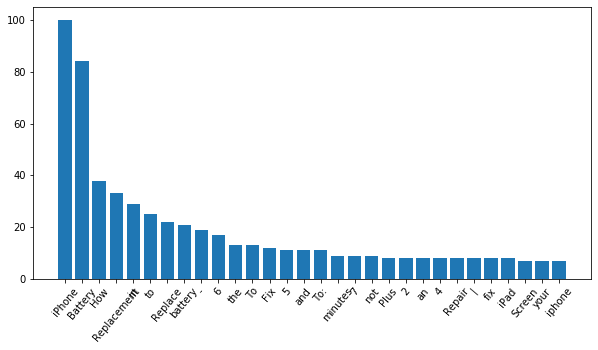

In [27]:
plt.figure(figsize=(10,5))
plt.bar((list(top30.keys())), top30.values())
plt.xticks(rotation=50)
plt.show()

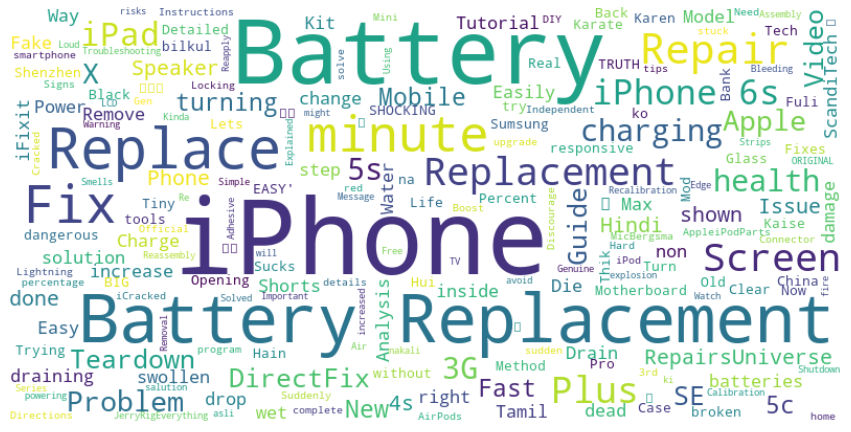

In [41]:
#wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(width = 800, height = 400, max_font_size=100, max_words=500, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()